In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../Assignment-1/Data/SF_Crime_Data_Focus_Cleaned.csv', parse_dates=["Incident Date"])

# Excercise Part 1: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.


Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the x-axis and create vertical jitter.

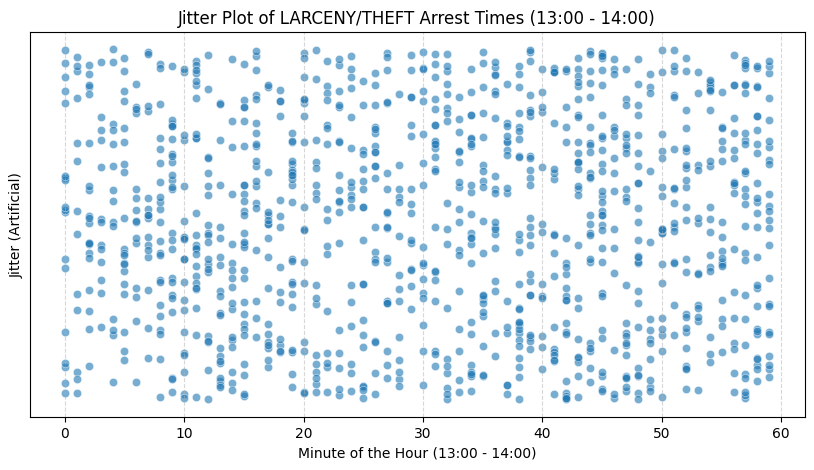

In [25]:
# Convert "Incident Time" to extract hours correctly
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")

# Generate random "Minute" values (since dataset only has Hour)
df["Minute"] = np.random.randint(0, 60, size=len(df))

# Select a crime type and filter a time interval (6 months)
crime_type = "LARCENY/THEFT"
start_date = "2023-01-01"
end_date = "2023-06-30"
selected_hour = 13  # 13:00 - 14:00

df_filtered = df[
    (df["Incident Category"] == crime_type) &
    (df["Incident Date"] >= start_date) &
    (df["Incident Date"] <= end_date) &
    (df["Hour"] == selected_hour)
].copy()  # Copy to avoid SettingWithCopyWarning

# Create vertical jitter using random values
df_filtered["Jitter"] = np.random.uniform(-0.3, 0.3, size=len(df_filtered))

# Plot jitter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_filtered["Minute"], y=df_filtered["Jitter"], alpha=0.6)

# Labels and aesthetics
plt.xlabel("Minute of the Hour (13:00 - 14:00)")
plt.ylabel("Jitter (Artificial)")
plt.title(f"Jitter Plot of {crime_type} Arrest Times (13:00 - 14:00)")
plt.yticks([])  # Hide y-axis ticks since jitter is artificial
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

This jitter plot visualizes the distribution of Larceny/Theft arrests occurring between 13:00 and 14:00.

Key Insights:
Dense and evenly spread points across all minutes suggest that arrests are recorded consistently throughout the hour.
No visible clustering at specific minutes—this could indicate that police reports do not record exact minutes accurately but rather round them.
The random vertical jitter is added to prevent overplotting and provide a clearer view of data density.

What This Plot Reveals:
Larceny/Theft arrests happen continuously across the hour rather than in bursts.
Data precision might be limited—officers may not always record precise arrest times.
If arrests were concentrated at specific minutes, it would suggest a pattern (e.g., scheduled patrols, organized crime waves).

In [26]:
crime_types = df["Incident Category"].value_counts()
print(crime_types.head(20))  # See top crime types


Incident Category
LARCENY/THEFT                  728284
ASSAULT                        226751
VANDALISM                      174951
VEHICLE THEFT                  174573
BURGLARY                       138195
DRUG/NARCOTIC                  133499
ROBBERY                         73272
WEAPON LAWS                     30740
DISORDERLY CONDUCT              25883
TRESPASS                        18649
PROSTITUTION                    17008
STOLEN PROPERTY                 15565
DRUNKENNESS                      9668
DRIVING UNDER THE INFLUENCE      5556
Name: count, dtype: int64


Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST Figure 2-2). I think the GPS data could be fun to see this way.
This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

Incident Category
BURGLARY         3253
DRUG/NARCOTIC    1470
Name: count, dtype: int64


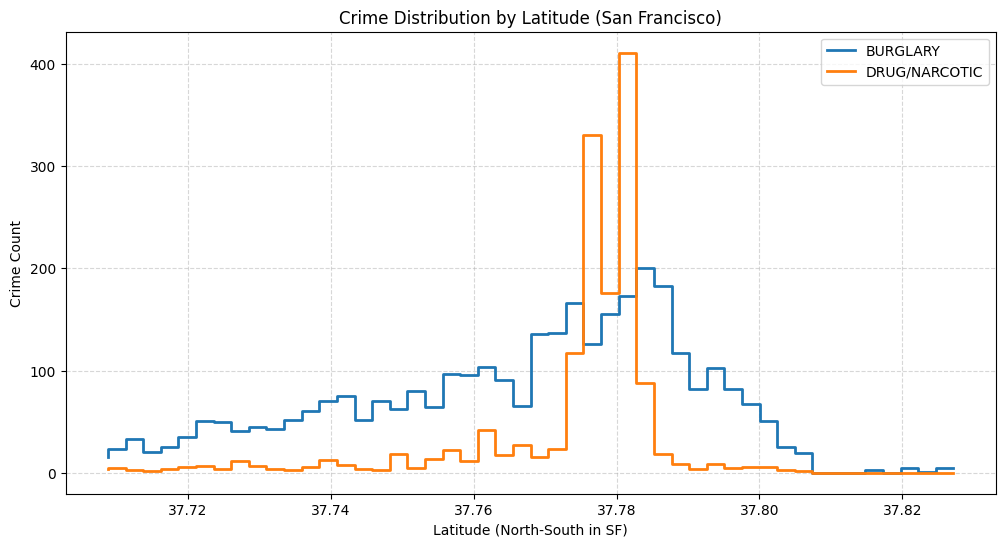

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define selected crime types
crime_types = ["BURGLARY", "DRUG/NARCOTIC"]
time_period = ("2023-01-01", "2023-06-30")  # 6-month interval

# Filter dataset for selected crimes and time period
df_filtered = df[
    (df["Incident Category"].isin(crime_types)) &
    (df["Incident Date"] >= time_period[0]) &
    (df["Incident Date"] <= time_period[1])
]

# Print number of crimes per category after filtering
print(df_filtered["Incident Category"].value_counts())

# Bin latitudes (50 bins across SF)
num_bins = 50
lat_min, lat_max = df_filtered["Latitude"].min(), df_filtered["Latitude"].max()
lat_bins = np.linspace(lat_min, lat_max, num_bins)

# Plot histograms for each crime type
plt.figure(figsize=(12, 6))
for crime in crime_types:
    latitudes = df_filtered[df_filtered["Incident Category"] == crime]["Latitude"].dropna()
    counts, bin_edges = np.histogram(latitudes, bins=lat_bins)

    plt.step(bin_edges[:-1], counts, label=f"{crime}", linewidth=2)  # Step plot for clarity

# Labels and aesthetics
plt.xlabel("Latitude (North-South in SF)")
plt.ylabel("Crime Count")
plt.title("Crime Distribution by Latitude (San Francisco)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


This step histogram compares the geographical distribution of Burglary and Drug/Narcotic crimes across different latitudes in San Francisco.

🔍 Key Insights:
Burglary (blue line) is more evenly spread across different latitudes but shows a clear peak around 37.78 latitude, suggesting a concentration of burglaries in specific areas.
Drug/Narcotic crimes (orange line) are highly concentrated at one specific latitude (~37.78), showing a much sharper peak compared to burglary.
The sharp peak in Drug/Narcotic crimes suggests a major hotspot, possibly near a known high-crime area such as Tenderloin or Mission District.
Burglary distribution is broader, indicating that this crime type is not as tied to a single location but occurs in multiple areas of the city.
🎯 What This Plot Reveals:
Drug/Narcotic offenses are more geographically concentrated, possibly due to specific high-activity areas.
Burglary is more dispersed, meaning it affects a broader range of neighborhoods.
This spatial analysis could help law enforcement focus resources on areas with high crime concentration.

Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. Here, you'll finde a pandas based strategy, but you can also use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot. There is also another nice tutorial for KDE plots here. Or ask your LLM what it recommends.

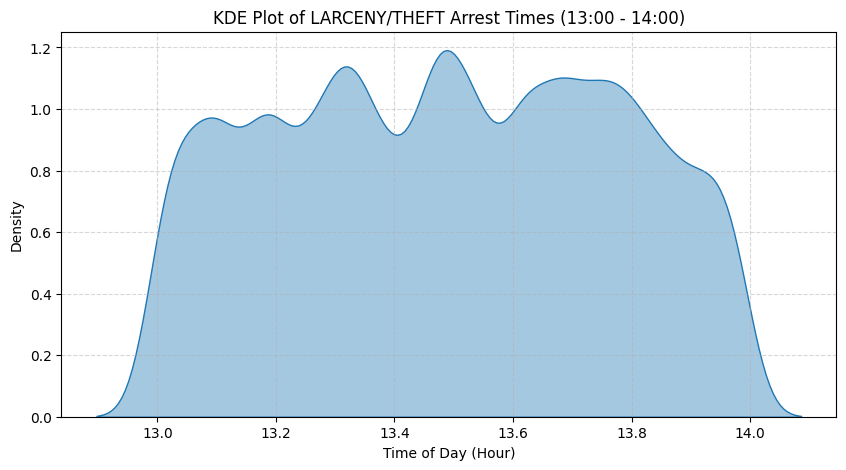

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the same data as Figure 2-1 (LARCENY/THEFT crimes between 13:00 - 14:00)
crime_type = "LARCENY/THEFT"
start_date = "2023-01-01"
end_date = "2023-06-30"
selected_hour = 13  # 13:00 - 14:00

# Ensure "Hour" is extracted properly
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")

df_filtered = df[
    (df["Incident Category"] == crime_type) &
    (df["Incident Date"] >= start_date) &
    (df["Incident Date"] <= end_date) &
    (df["Hour"] == selected_hour)
].copy()

# Generate random "Minute" values since we only have hour-level data
df_filtered["Minute"] = np.random.randint(0, 60, size=len(df_filtered))

# Convert time into fractional hours (e.g., 13:30 → 13.5)
df_filtered["Time (Fractional)"] = df_filtered["Hour"] + (df_filtered["Minute"] / 60)

# KDE plot using Seaborn
plt.figure(figsize=(10, 5))
sns.kdeplot(df_filtered["Time (Fractional)"], bw_adjust=0.5, fill=True, alpha=0.4)

# Labels and aesthetics
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Density")
plt.title(f"KDE Plot of {crime_type} Arrest Times (13:00 - 14:00)")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?

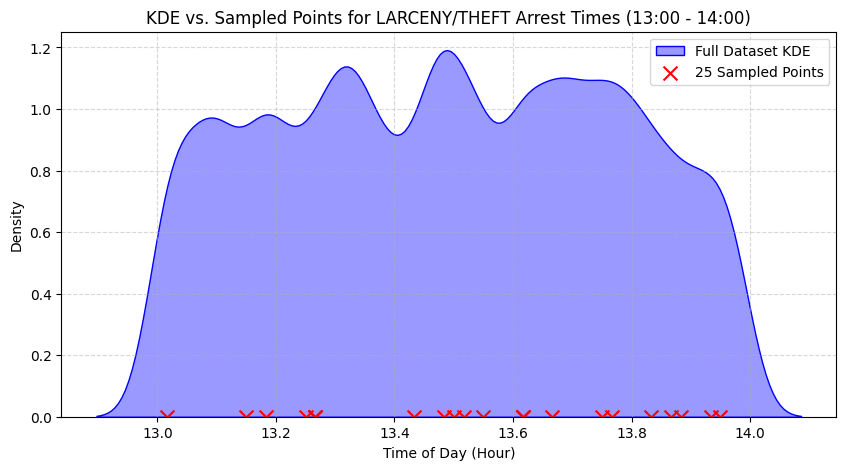

In [29]:
import random

# Randomly sample 25 points from the filtered dataset
df_sampled = df_filtered.sample(n=25, random_state=42)

# KDE plot for the original full dataset
plt.figure(figsize=(10, 5))
sns.kdeplot(df_filtered["Time (Fractional)"], bw_adjust=0.5, fill=True, alpha=0.4, color="blue", label="Full Dataset KDE")

# Scatter plot of the 25 randomly selected points
plt.scatter(df_sampled["Time (Fractional)"], np.zeros(len(df_sampled)), color="red", marker="x", s=100, label="25 Sampled Points")

# Labels and aesthetics
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Density")
plt.title(f"KDE vs. Sampled Points for {crime_type} Arrest Times (13:00 - 14:00)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


Key Observations
The KDE plot (blue) suggests a smooth and continuous crime distribution.
However, when looking at the 25 sampled points (red Xs):
You can see that the true data points are much sparser than what the KDE suggests.
The peaks and valleys in the KDE might be artificial, depending on the kernel bandwidth.
Why is this misleading?
KDE smooths over gaps in data, even when real events are not evenly spread.
If we only had 25 points, the KDE curve might make us believe that there are more crimes at times where no actual crimes exist.


KDE is useful for detecting trends, but it hides gaps in data.
A small dataset can lead to fake smoothness that does not represent reality.
Always double-check KDE results against raw data points to avoid misinterpretation!

## Now we'll work on creating two versions of the plot in Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.


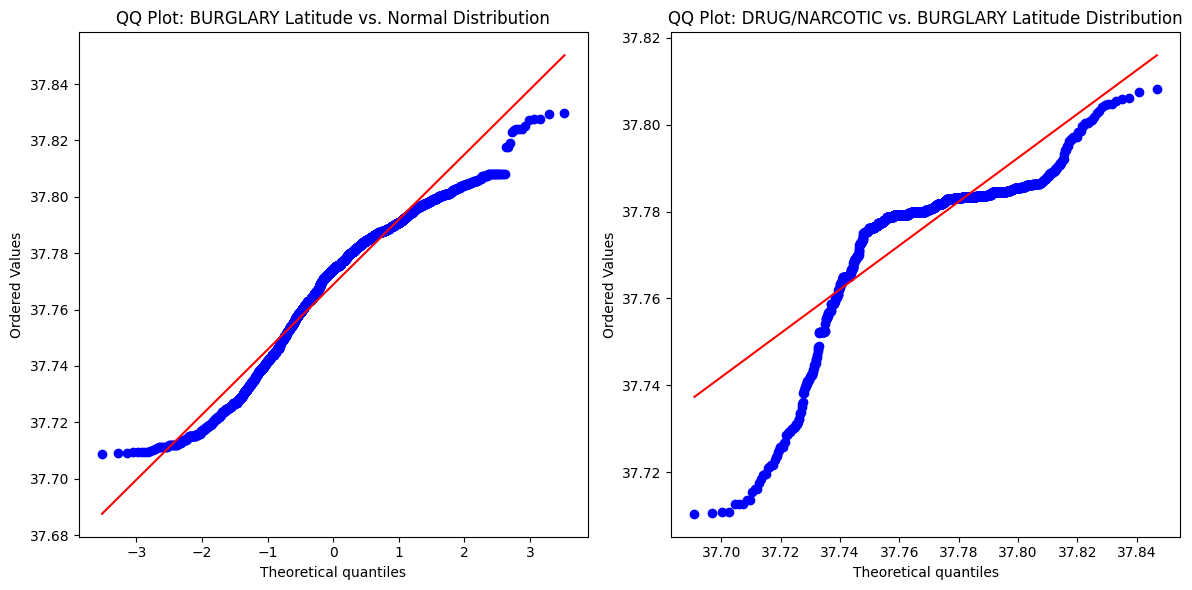

In [32]:
import scipy.stats as stats

# Select the same crime types from Figure 2-2 (BURGLARY vs. DRUG/NARCOTIC)
crime_types = ["BURGLARY", "DRUG/NARCOTIC"]
time_period = ("2023-01-01", "2023-06-30")  # 6-month interval

# Filter dataset for selected crimes and time period
df_filtered = df[
    (df["Incident Category"].isin(crime_types)) &
    (df["Incident Date"] >= time_period[0]) &
    (df["Incident Date"] <= time_period[1])
]

# Extract latitude data for each crime type
lat_burglary = df_filtered[df_filtered["Incident Category"] == "BURGLARY"]["Latitude"].dropna()
lat_drug = df_filtered[df_filtered["Incident Category"] == "DRUG/NARCOTIC"]["Latitude"].dropna()

# Create figure for QQ plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# QQ Plot: Compare BURGLARY Latitudes to Normal Distribution
stats.probplot(lat_burglary, dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot: BURGLARY Latitude vs. Normal Distribution")

# QQ Plot: Compare BURGLARY vs. DRUG/NARCOTIC Latitudes
stats.probplot(lat_drug, dist=stats.norm(loc=lat_burglary.mean(), scale=lat_burglary.std()), plot=axes[1])
axes[1].set_title("QQ Plot: DRUG/NARCOTIC vs. BURGLARY Latitude Distribution")

# Improve layout
plt.tight_layout()
plt.show()






These QQ (Quantile-Quantile) plots compare the latitude distribution of Burglary and Drug/Narcotic crimes to theoretical distributions.

- Left Plot: Burglary Latitude vs. Normal Distribution
If Burglary latitudes followed a normal distribution, the blue points would align closely with the red diagonal line.
The curved deviation at the extremes suggests that Burglary locations do not perfectly follow a normal distribution.
More clustering around certain latitudes indicates that burglaries are geographically concentrated rather than randomly distributed.
- Right Plot: Drug/Narcotic vs. Burglary Latitude
Instead of comparing to a normal distribution, this plot compares Drug/Narcotic crime locations to Burglary locations.
The significant upward curve suggests that Drug/Narcotic crimes are even more geographically concentrated than Burglary.
This confirms what we saw in the histogram—Drug/Narcotic crimes have a sharp peak at a specific latitude, while Burglary is more spread out.
- What These Plots Reveal That Others Didn't
The normality check shows that Burglary has a broader spread, but it's still not fully normal.
The comparison QQ plot confirms that Drug/Narcotic crimes are disproportionately concentrated in one region.
This method quantifies location differences more precisely than a histogram alone.



OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 10 focus crimes defined previously.
For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data.
Create a box-and whiskers plot showing the mean, median, quantiles, etc for all the 10 different focus crimes side-by-side. There are many ways to do this. I like to use matplotlibs's built in functionality, but you can also achieve good results with seaborn or pandas. It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!.

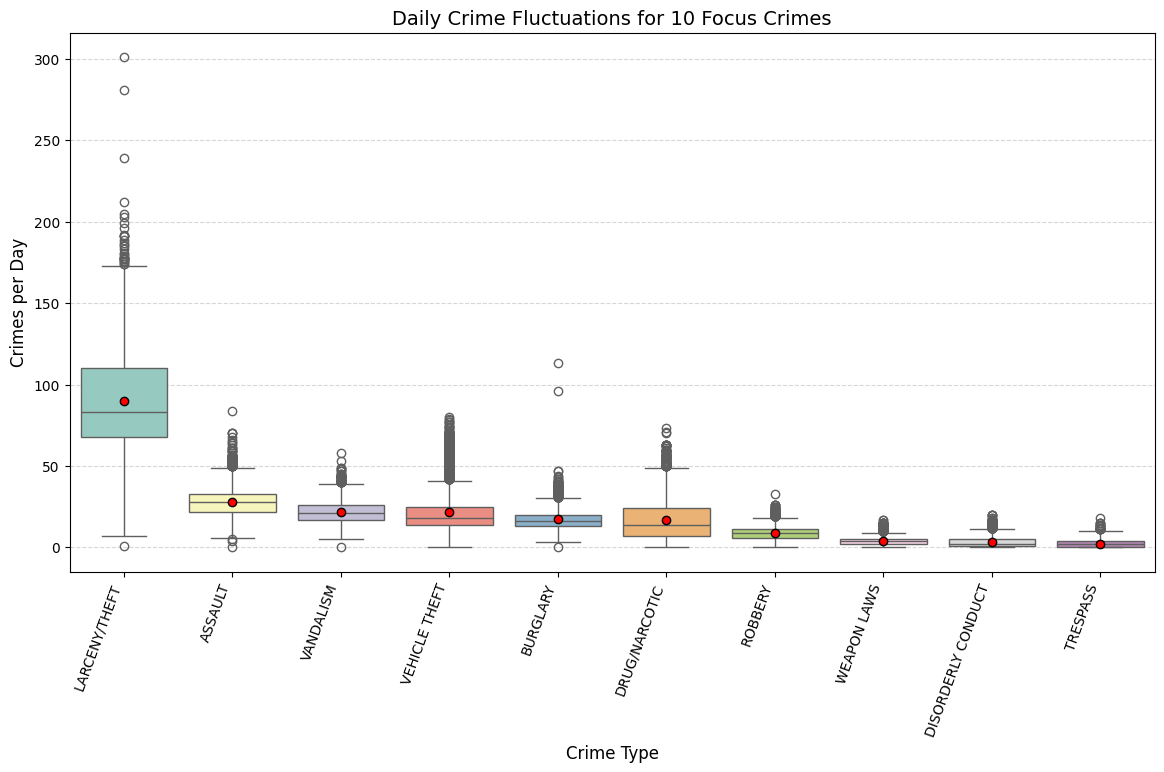

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 10 focus crimes
focus_crimes = [
    "LARCENY/THEFT", "ASSAULT", "VANDALISM", "VEHICLE THEFT", "BURGLARY",
    "DRUG/NARCOTIC", "ROBBERY", "WEAPON LAWS", "DISORDERLY CONDUCT", "TRESPASS"
]

# Convert 'Incident Date' to datetime format
df["Incident Date"] = pd.to_datetime(df["Incident Date"], errors="coerce")

# Filter for only the focus crimes
df_focus = df[df["Incident Category"].isin(focus_crimes)]

# Count number of crimes per day for each category
daily_counts = df_focus.groupby(["Incident Date", "Incident Category"]).size().unstack(fill_value=0)

# Create an improved box plot
plt.figure(figsize=(14, 7))

# Use seaborn for a better-styled boxplot
sns.boxplot(data=daily_counts[focus_crimes], palette="Set3", showmeans=True, meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black"})

# Improve readability
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Crimes per Day", fontsize=12)
plt.title("Daily Crime Fluctuations for 10 Focus Crimes", fontsize=14)
plt.xticks(rotation=70, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


LARCENY/THEFT has the highest daily fluctuation

The median is high, and the whiskers are long, showing a wide range of crime counts per day.
Many outliers suggest that some days have significantly higher crime spikes.
Other crimes show more stable daily counts

Crimes like TRESPASS, WEAPON LAWS, and DISORDERLY CONDUCT have smaller boxes and short whiskers, meaning less fluctuation in daily crime counts.
Crimes with notable variation:

BURGLARY, VEHICLE THEFT, and DRUG/NARCOTIC show moderate fluctuation with some high outliers.
This suggests some days experience unusual crime spikes.


LARCENY/THEFT has the highest daily fluctuation

The median is high, and the whiskers are long, showing a wide range of crime counts per day.
Many outliers suggest that some days have significantly higher crime spikes.
Other crimes show more stable daily counts

Crimes like TRESPASS, WEAPON LAWS, and DISORDERLY CONDUCT have smaller boxes and short whiskers, meaning less fluctuation in daily crime counts.
Crimes with notable variation:

BURGLARY, VEHICLE THEFT, and DRUG/NARCOTIC show moderate fluctuation with some high outliers.
This suggests some days experience unusual crime spikes.


It Highlights Outliers More Clearly
The whiskers and dots in the box plot explicitly show extreme outliers (unusually high-crime days).
In contrast, KDE and histograms smooth out these spikes, making it harder to spot them.
Example: In Larceny/Theft, some days have 300+ crimes, which wasn’t as clear before.
Key Insight:
Some crimes experience rare but extreme spikes, which could indicate major events, police crackdowns, or seasonal effects.


It Compares Multiple Crime Types Side by Side
Unlike KDEs (which focus on one crime type at a time), the box plot allows us to compare 10 crime types simultaneously.
We can instantly see:
Which crimes are most frequent per day (Larceny/Theft, Assault).
Which crimes are the most stable (Weapon Laws, Trespass).
Which crimes have similar patterns (Vehicle Theft & Burglary have similar daily ranges).
Key Insight:
Some crimes fluctuate daily, while others are more stable and predictable.


It Shows the Median vs. Mean Difference
The red dot represents the mean, and the middle line inside the box is the median.
If the mean is far above the median, it suggests skewness, meaning occasional crime surges drive up the average.
🔹 Key Insight:

In Larceny/Theft, the mean is above the median, suggesting high-crime days skew the data.
In Trespass or Weapon Laws, the mean and median are close, meaning crimes occur at a more stable rate.


/var/folders/0q/x2dyyz5d7xs7zzrfhj8l86840000gp/T/ipykernel_97042/4001342964.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_focus, x="Incident Category", y="Time (Fractional)", palette="Set3", showmeans=True,


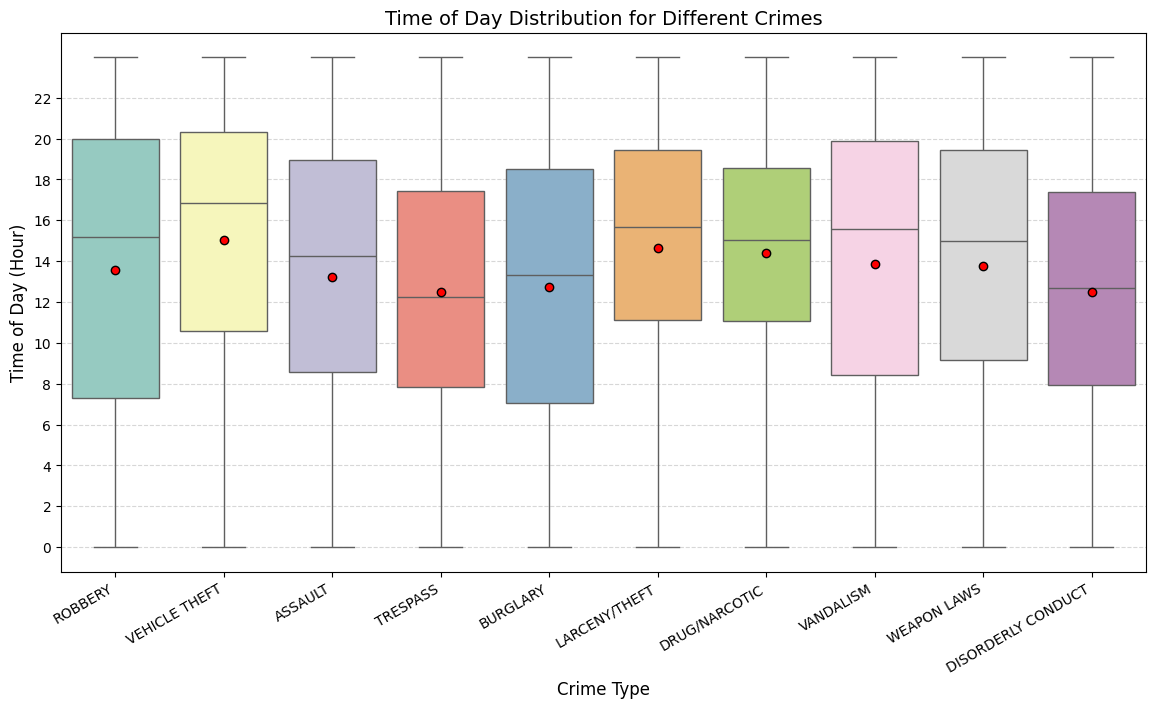

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the 10 focus crimes
focus_crimes = [
    "LARCENY/THEFT", "ASSAULT", "VANDALISM", "VEHICLE THEFT", "BURGLARY",
    "DRUG/NARCOTIC", "ROBBERY", "WEAPON LAWS", "DISORDERLY CONDUCT", "TRESPASS"
]

# Convert 'Incident Time' to proper format (Fractional Hours)
df["Hour"] = pd.to_numeric(df["Incident Time"], errors="coerce")  # Ensure numeric hour
df["Minute"] = np.random.randint(0, 60, size=len(df))  # Assign random minutes (if missing)
df["Time (Fractional)"] = df["Hour"] + (df["Minute"] / 60)  # Convert to fractional hours

# Filter for focus crimes and drop NaNs
df_focus = df[df["Incident Category"].isin(focus_crimes)][["Incident Category", "Time (Fractional)"]].dropna()

# Create the box plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_focus, x="Incident Category", y="Time (Fractional)", palette="Set3", showmeans=True,
            meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"})

# Improve readability
plt.xlabel("Crime Type", fontsize=12)
plt.ylabel("Time of Day (Hour)", fontsize=12)
plt.title("Time of Day Distribution for Different Crimes", fontsize=14)
plt.xticks(rotation=30, ha="right")
plt.yticks(np.arange(0, 24, 2))  # Show hours on y-axis for clarity
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


This box plot visualizes the distribution of crimes by time of day across different crime types.

 Key Insights:
Most crimes occur throughout the day, as seen by the wide spread of all categories.
The median (black line inside the box) and mean (red dot) for each crime type show when crimes typically occur:
Robbery tends to occur more often in the evening (higher median).
Trespass and Burglary have lower median times, suggesting they are more common in the morning or early afternoon.
Larceny/Theft and Drug/Narcotic offenses have a broad distribution, meaning they happen evenly throughout the day.
The whiskers show the full time range when crimes occur, with some extending close to midnight and early morning hours, indicating that crimes are not strictly tied to business hours.
